In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import time
import sklearn
import scipy

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from imblearn.over_sampling import SMOTE

In [3]:
from PlottingFunction import lda_1Dplot, plotModel, data_1Dplot
from Classification import model_fit, plot_confusion_matrix, model_fit2

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
heart = pd.read_csv('FinalHeart.csv')
heart.drop(['Unnamed: 0'],axis=1,inplace=True)

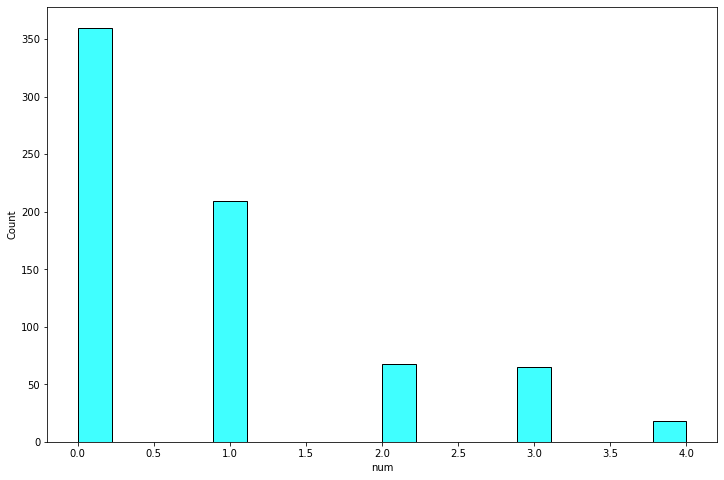

In [6]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
sns.histplot(data = heart, x = 'num', ax = ax, color = 'cyan');

In [7]:
heart_num0 = heart.loc[heart.num==0,:].copy()
heart_num1 = heart.loc[heart.num==1,:].copy()
heart_num2 = heart.loc[heart.num==2,:].copy()
heart_num3 = heart.loc[heart.num==3,:].copy()
heart_num4 = heart.loc[heart.num==4,:].copy()

In [8]:
from sklearn.utils import resample

In [9]:
heart_num1 = resample(heart_num1, replace=True, n_samples=360, random_state = 144) 
heart_num2 = resample(heart_num2, replace=True, n_samples=360, random_state = 144) 
heart_num3 = resample(heart_num3, replace=True, n_samples=360, random_state = 144) 
heart_num4 = resample(heart_num4, replace=True,      n_samples=360,    random_state=144) 

In [10]:
print(heart_num0.shape[0])
print(heart_num1.shape[0])
print(heart_num2.shape[0])
print(heart_num3.shape[0])
print(heart_num4.shape[0])

360
360
360
360
360


In [11]:
heart_up = pd.concat([heart_num0,heart_num1,heart_num2,heart_num3,heart_num4])

In [12]:
heart_up.shape

(1800, 14)

In [13]:
X = heart_up.drop(['num'],axis=1).copy()
Y = heart_up.num.copy()

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.33, stratify=Y, shuffle=True)

In [15]:
SC = StandardScaler()
X_scaled = SC.fit_transform(X)

In [16]:
X_train_scaled, X_test_scaled, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.33, random_state=144, shuffle=True, stratify=Y)

In [17]:
glm = LogisticRegression(max_iter = 1e7)
model_fit2(glm, X_train, X_test, Y_train, Y_test)

glm = LogisticRegression(max_iter = 1e7)
model_fit2(glm, X_train_scaled, X_test_scaled, Y_train, Y_test)
#plot_confusion_matrix(glm, X_train_scaled, X_test_scaled, Y_train, Y_test)

rfc = RandomForestClassifier()
model_fit2(rfc, X_train_scaled, X_test_scaled, Y_train, Y_test)
#plot_confusion_matrix(rfc, X_train_scaled, X_test_scaled, Y_train, Y_test)

LogisticRegression
Train score is :0.272
Test score is :0.192
LogisticRegression
Train score is :0.478
Test score is :0.455
RandomForestClassifier
Train score is :1.0
Test score is :0.934


In [ ]:
X_original = heart.drop(['num'],axis=1).copy()
Y_original = heart.num.copy()

X_original_scaled = SC.fit_transform(X_original)

X_train_original, X_test_original, Y_train_original, Y_test_original = train_test_split(X_original_scaled, Y_original,
            test_size=0.33, random_state=144, shuffle=True, stratify = Y_original)

print(rfc.score(X_train_original, Y_train_original))
print(rfc.score(X_test_original, Y_test_original))
plot_confusion_matrix(rfc, X_train_original, X_test_original, Y_train_original, Y_test_original)

In [ ]:
LDA = LinearDiscriminantAnalysis()
model_fit2(LDA, X_train_scaled, X_test_scaled, Y_train, Y_test)

In [ ]:
QDA = QuadraticDiscriminantAnalysis()
QDA.set_params(reg_param = 0.4)
model_fit2(QDA, X_train_scaled, X_test_scaled, Y_train, Y_test)

In [ ]:
GNB = GaussianNB()
model_fit2(GNB, X_train_scaled, X_test_scaled, Y_train, Y_test)

In [ ]:
gbc = GradientBoostingClassifier()
#gbc.set_params(random_state = 144, n_estimators = 5000, max_features = 5, max_depth = 5, min_samples_split = 25, 
              #min_weight_fraction_leaf = 0.05, ccp_alpha = 1e-2)
model_fit2(gbc, X_train_scaled, X_test_scaled, Y_train, Y_test)

In [ ]:
print(gbc.score(X_train_original, Y_train_original))
print(gbc.score(X_test_original, Y_test_original))
plot_confusion_matrix(gbc, X_train_original, X_test_original, Y_train_original, Y_test_original)

In [ ]:
xgb_cl = XGBClassifier()
xgb_cl.set_params(random_state=144)
model_fit2(xgb_cl, X_train_scaled, X_test_scaled, Y_train, Y_test)
plot_confusion_matrix(xgb_cl, X_train_original, X_test_original, Y_train_original, Y_test_original)

In [ ]:
print(xgb_cl.score(X_train_original, Y_train_original))
print(xgb_cl.score(X_test_original, Y_test_original))

In [ ]:
oversample = SMOTE()

In [ ]:
oversample.get_params()

In [ ]:
X_temp, Y_temp = oversample.fit_resample(X_original, Y_original)

In [ ]:
X_original.shape

In [ ]:
X_temp.shape

In [ ]:
print(str(X_original.loc[Y_original==0,:].shape[0]) + " " + str(X_temp.loc[Y_temp==0,:].shape[0]))
print(str(X_original.loc[Y_original==1,:].shape[0]) + " " + str(X_temp.loc[Y_temp==1,:].shape[0]))
print(str(X_original.loc[Y_original==2,:].shape[0]) + " " + str(X_temp.loc[Y_temp==2,:].shape[0]))
print(str(X_original.loc[Y_original==3,:].shape[0]) + " " + str(X_temp.loc[Y_temp==3,:].shape[0]))
print(str(X_original.loc[Y_original==4,:].shape[0]) + " " + str(X_temp.loc[Y_temp==4,:].shape[0]))

In [ ]:
X_train_temp, X_test_temp, Y_train_temp, Y_test_temp = train_test_split(X_temp, Y_temp, test_size=0.33, 
                                                                  random_state=144, shuffle=True, stratify=Y)

In [ ]:
glm = LogisticRegression(max_iter = 1e7)
model_fit2(glm, X_train_temp, X_test_temp, Y_train_temp, Y_test_temp)
#plot_confusion_matrix(glm, X_train_scaled, X_test_scaled, Y_train, Y_test)

rfc = RandomForestClassifier()
model_fit2(rfc, X_train_temp, X_test_temp, Y_train_temp, Y_test_temp)
#plot_confusion_matrix(rfc, X_train_scaled, X_test_scaled, Y_train, Y_test)

In [ ]:
X_train_original, X_test_original, Y_train_original, Y_test_original = train_test_split(X_original, Y_original,
            test_size=0.33, random_state=144, shuffle=True, stratify = Y_original)
print(rfc.score(X_train_original, Y_train_original))
print(rfc.score(X_test_original, Y_test_original))